In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from apeer_ometiff_library import io
import numpy as np
import copy
import tifffile

import utils.ImageParser as IP


In [2]:

# open one image
img_path = '/home/martinha/PycharmProjects/phd/breast_cancer_imc/breast_data/imc_metabric2022/MBTMEIMCPublic/Images/MB0000_64_FullStack.tiff'
img = IP.parse_image(img_path)

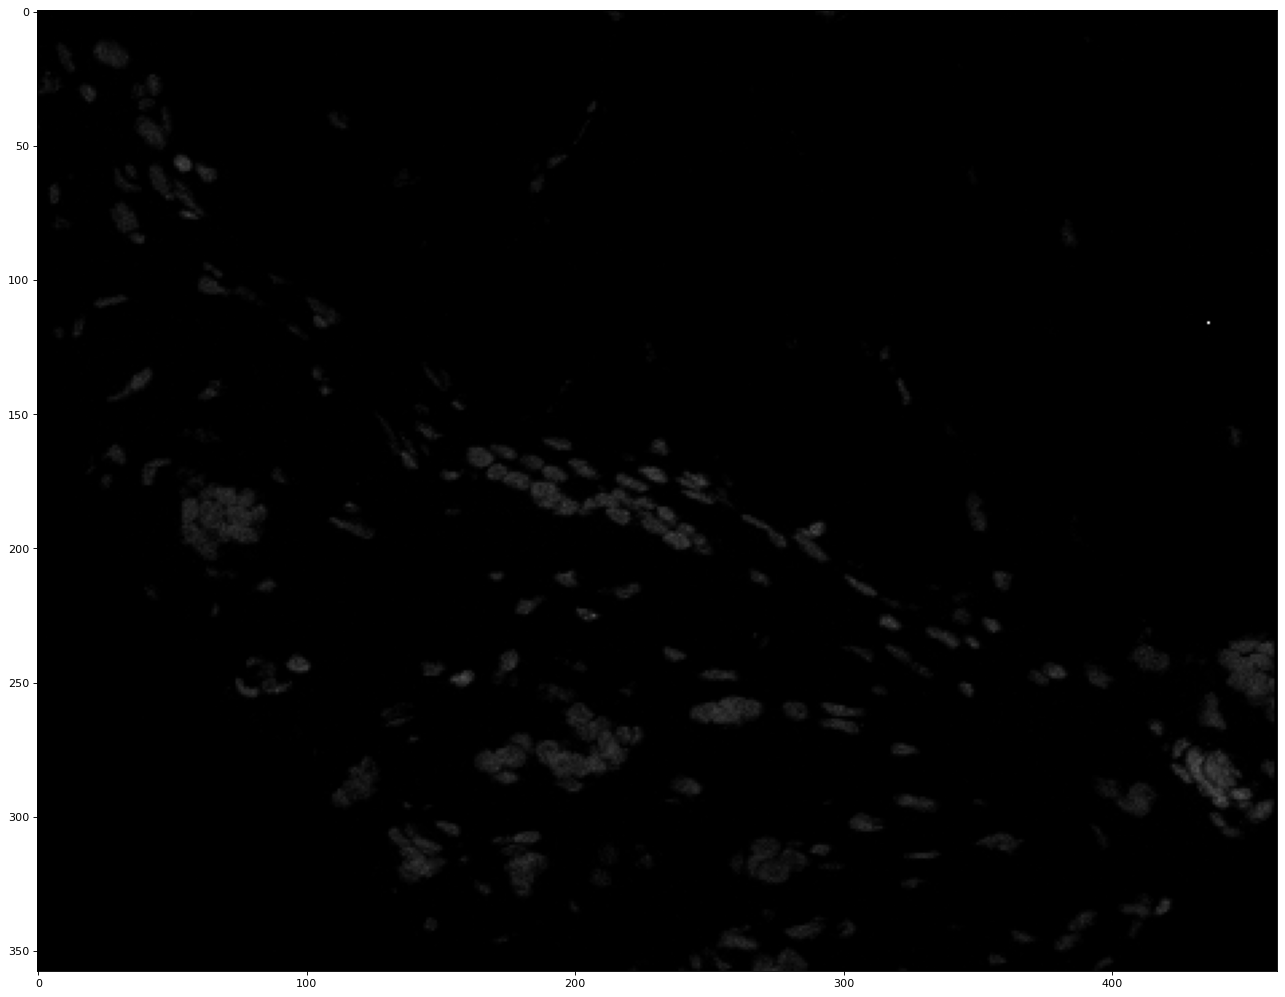

In [16]:
figure(figsize = (20, 20), dpi = 80)
img_or = np.moveaxis(img, -1, 0)
plt.imshow(img_or[37,:,:], cmap='gray')
plt.show()

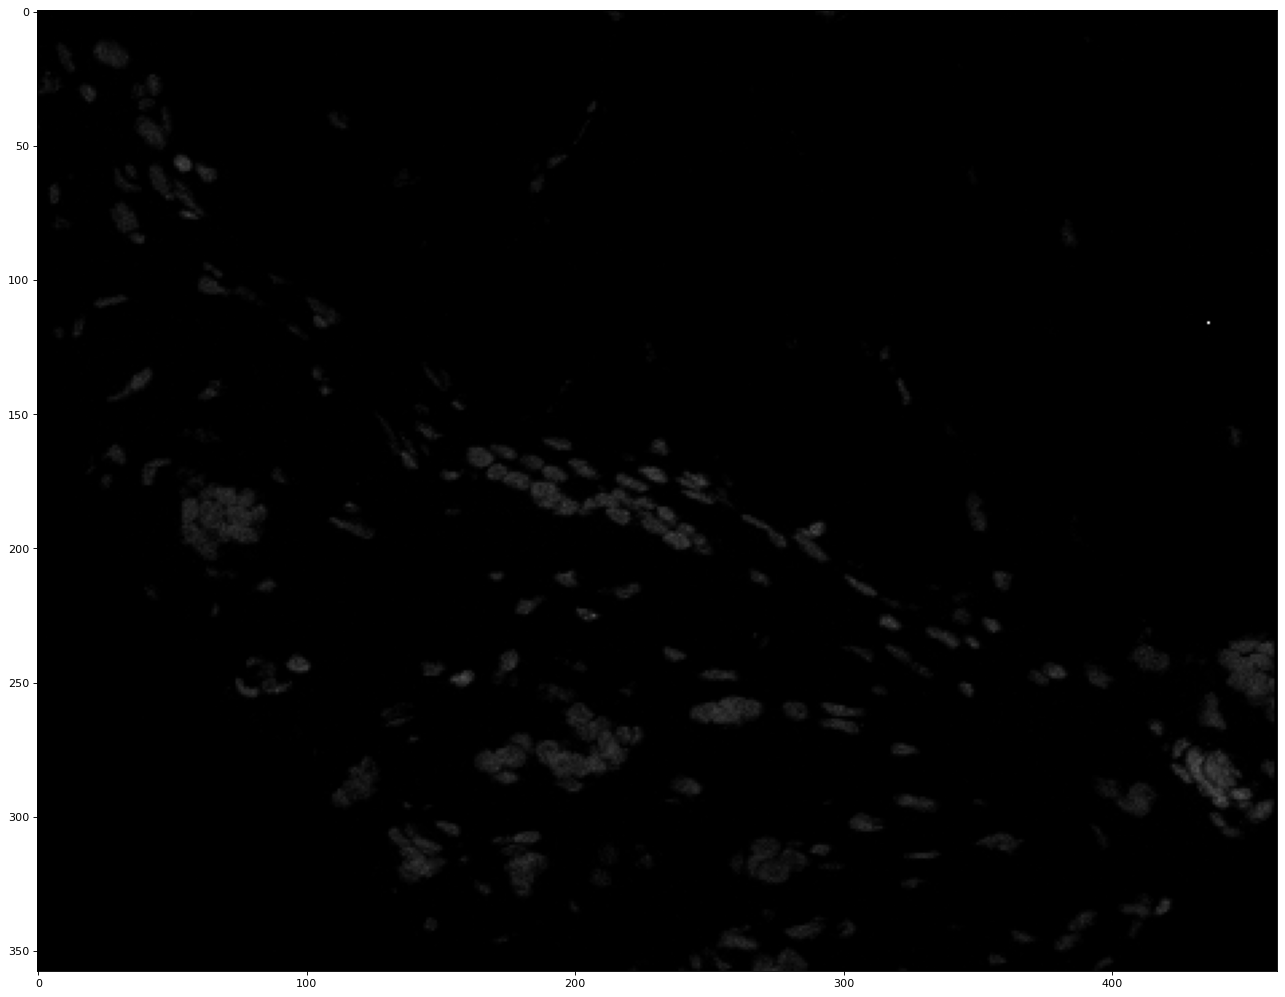

In [18]:
figure(figsize = (20, 20), dpi = 80)
img_or_norm = IP.normalize_by_channel(img)
img_or_norm = np.moveaxis(img_or_norm, -1, 0)
plt.imshow(img_or[37,:,:], cmap='gray')
plt.show()

In [24]:

# Smooth
smooth_img = copy.deepcopy(img)
distance_p = 2  # 2 for window 5 to 5
for i in range(img.shape[2]):  # range in channels
    ch = img[:, :, i]  # 2 dim

    for pixel_x in range(img.shape[0]):
        for pixel_y in range(img.shape[1]):
            pixel = ch[pixel_x, pixel_y]

            # taking care of corners of image
            if pixel_x - distance_p < 0:
                min_pixel_x = 0
            else:
                min_pixel_x = pixel_x - distance_p
            if pixel_x + distance_p > img.shape[0]:
                max_pixel_x = img.shape[0]
            else:
                max_pixel_x = pixel_x + distance_p

            if pixel_y - distance_p < 0:
                min_pixel_y = 0
            else:
                min_pixel_y = pixel_y - distance_p
            if pixel_y + distance_p > img.shape[1]:
                max_pixel_y = img.shape[1]
            else:
                max_pixel_y = pixel_y + distance_p

            # get mean values
            window = ch[min_pixel_x:max_pixel_x, min_pixel_y:max_pixel_y]
            mean = np.mean(window)
            # mean = np.percentile(window, 25) # percentile 25
            # median?
            # weighted average?

            # take care of corners because will give a error
            smooth_img[pixel_x, pixel_y, i] = mean

print(smooth_img.shape)

(358, 462, 39)


(358, 462, 39)


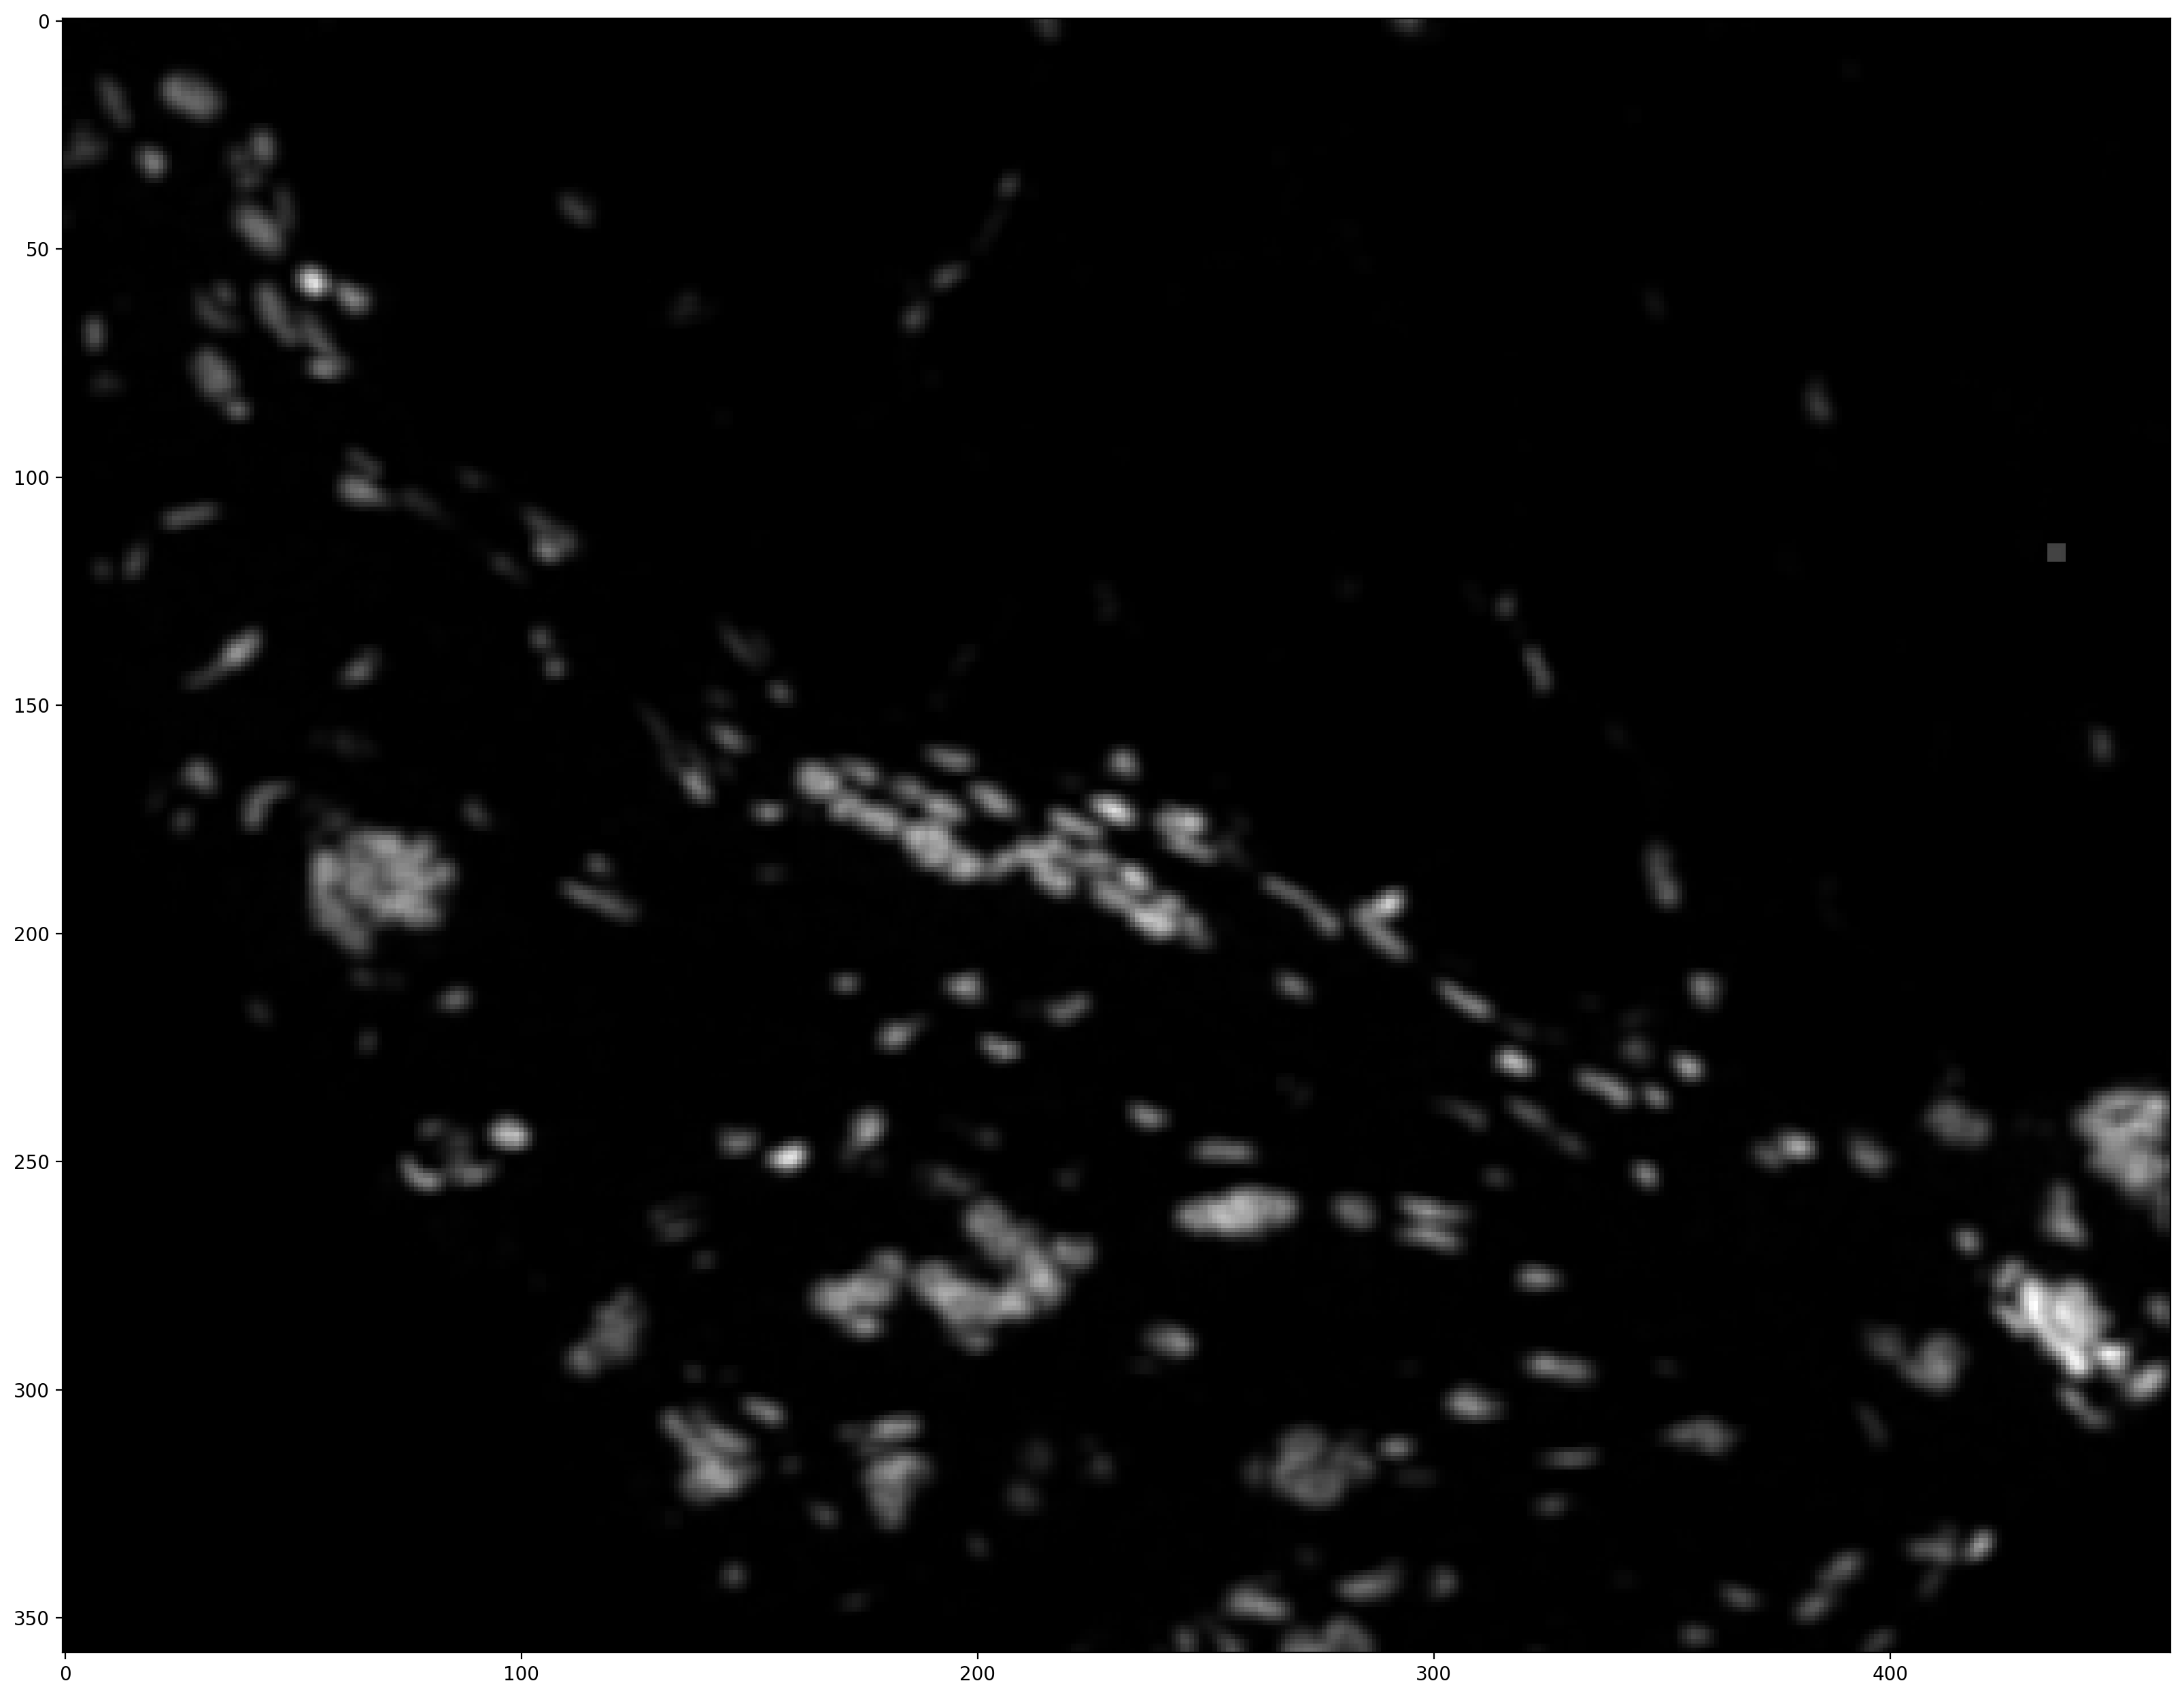

In [26]:
smooth_img_plt = np.moveaxis(smooth_img, -1, 0)
print(smooth_img.shape)
figure(figsize = (20, 20), dpi = 200)
plt.imshow(smooth_img_plt[37,:,:], cmap='gray')
plt.show()

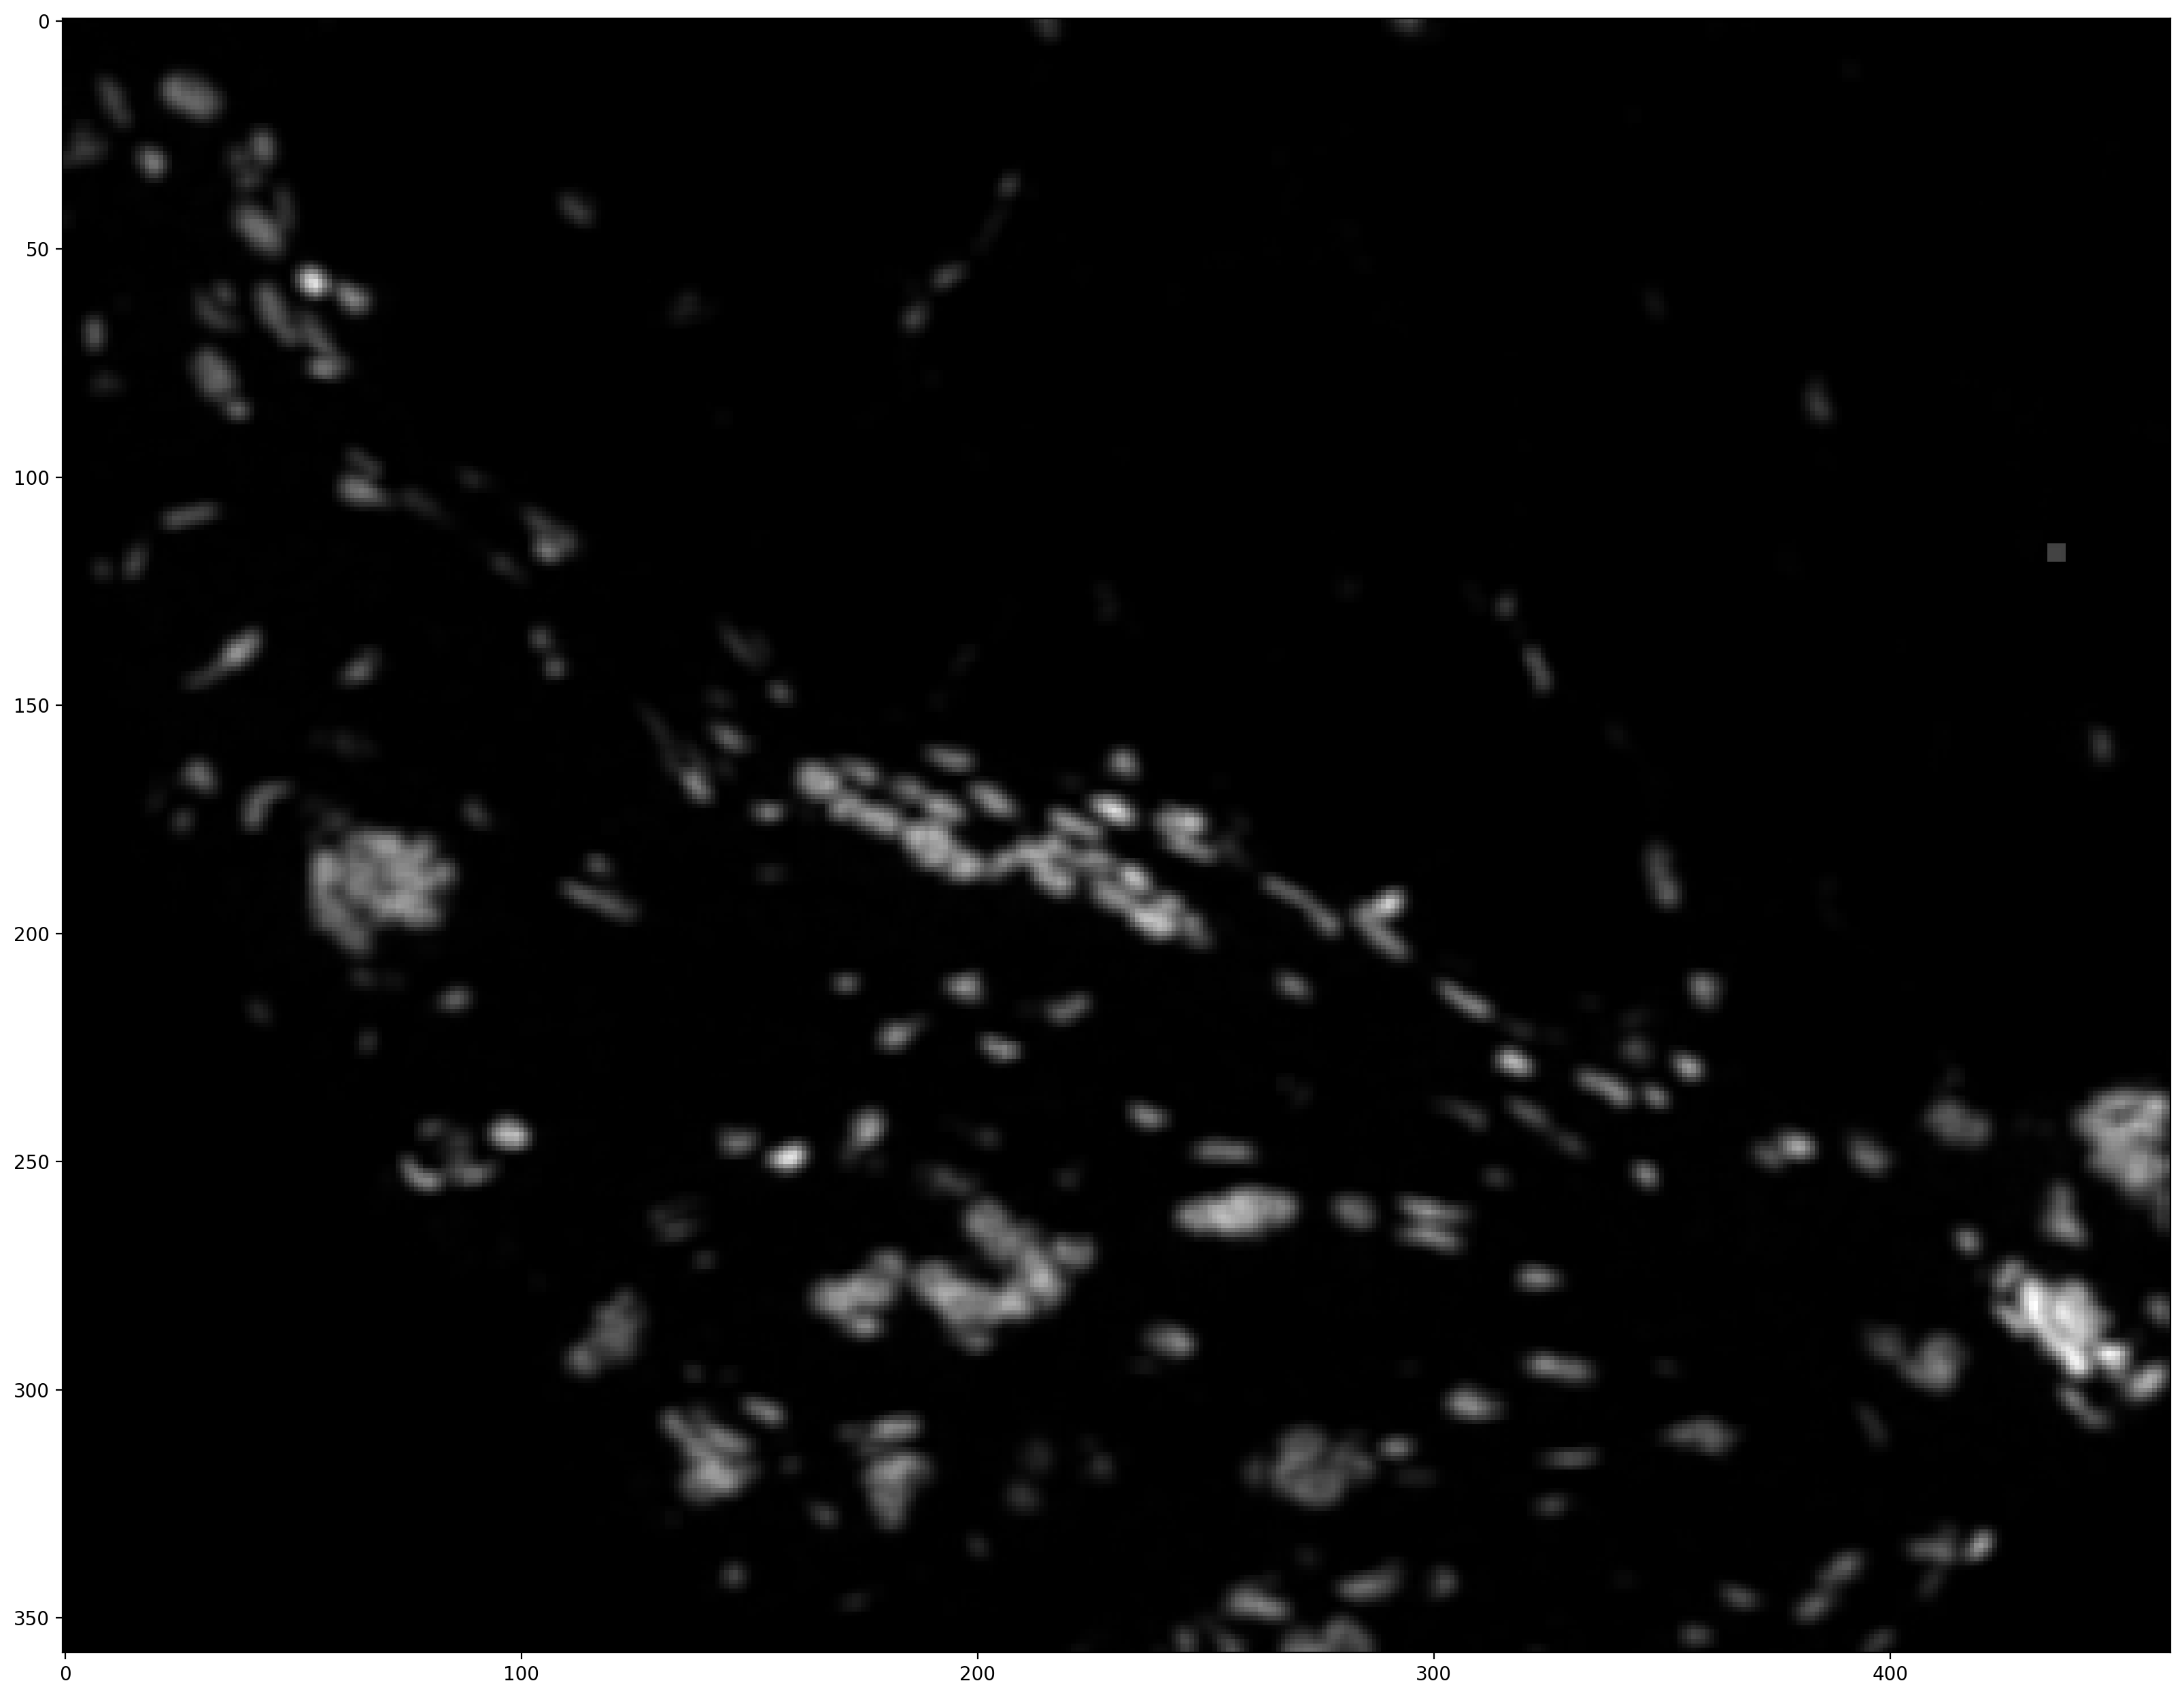

In [28]:
figure(figsize = (20, 20), dpi = 200)
img_smooth_norm = IP.normalize_by_channel(smooth_img)
img_smooth_norm = np.moveaxis(img_smooth_norm, -1, 0)
plt.imshow(img_smooth_norm[37,:,:], cmap='gray')
plt.show()

In [29]:

# Smooth
smooth_img = copy.deepcopy(img)
distance_p = 1  # 2 for window 5 to 5
for i in range(img.shape[2]):  # range in channels
    ch = img[:, :, i]  # 2 dim

    for pixel_x in range(img.shape[0]):
        for pixel_y in range(img.shape[1]):
            pixel = ch[pixel_x, pixel_y]

            # taking care of corners of image
            if pixel_x - distance_p < 0:
                min_pixel_x = 0
            else:
                min_pixel_x = pixel_x - distance_p
            if pixel_x + distance_p > img.shape[0]:
                max_pixel_x = img.shape[0]
            else:
                max_pixel_x = pixel_x + distance_p

            if pixel_y - distance_p < 0:
                min_pixel_y = 0
            else:
                min_pixel_y = pixel_y - distance_p
            if pixel_y + distance_p > img.shape[1]:
                max_pixel_y = img.shape[1]
            else:
                max_pixel_y = pixel_y + distance_p

            # get mean values
            window = ch[min_pixel_x:max_pixel_x, min_pixel_y:max_pixel_y]
            mean = np.mean(window)
            # mean = np.percentile(window, 25) # percentile 25
            # median?
            # weighted average?

            # take care of corners because will give a error
            smooth_img[pixel_x, pixel_y, i] = mean

print(smooth_img.shape)

(358, 462, 39)


(358, 462, 39)


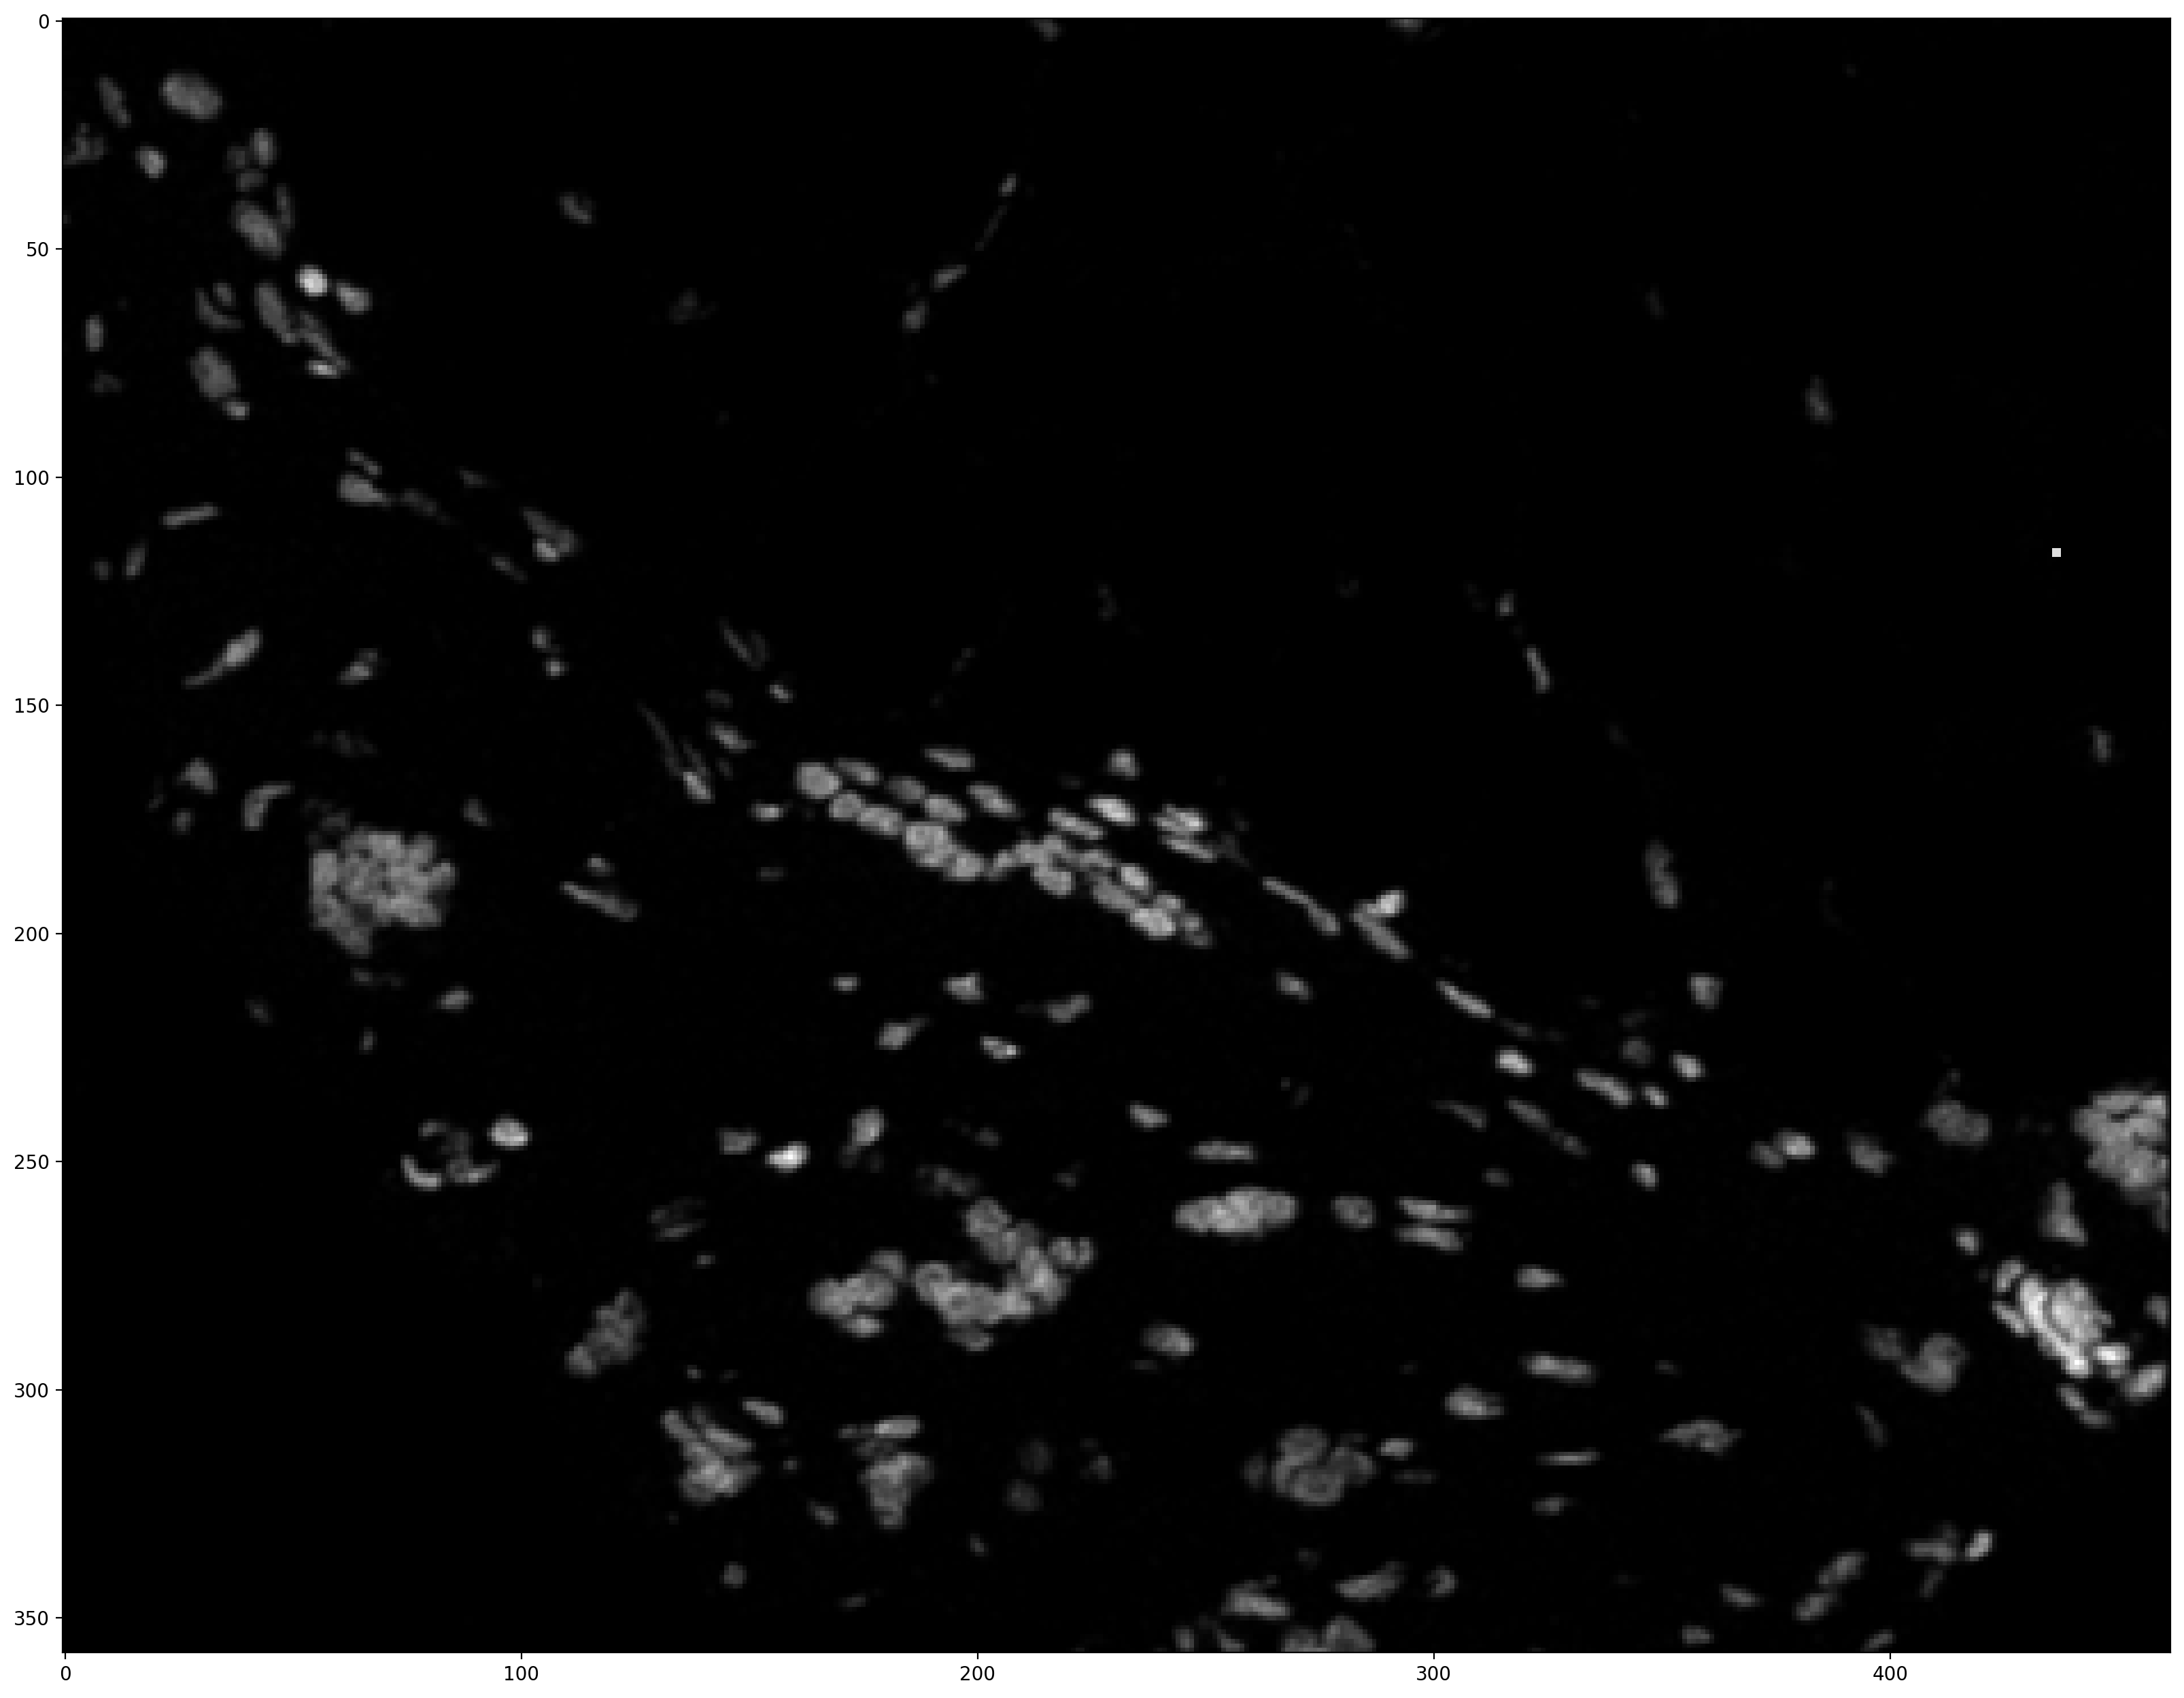

In [30]:
smooth_img_plt = np.moveaxis(smooth_img, -1, 0)
print(smooth_img.shape)
figure(figsize = (20, 20), dpi = 200)
plt.imshow(smooth_img_plt[37,:,:], cmap='gray')
plt.show()

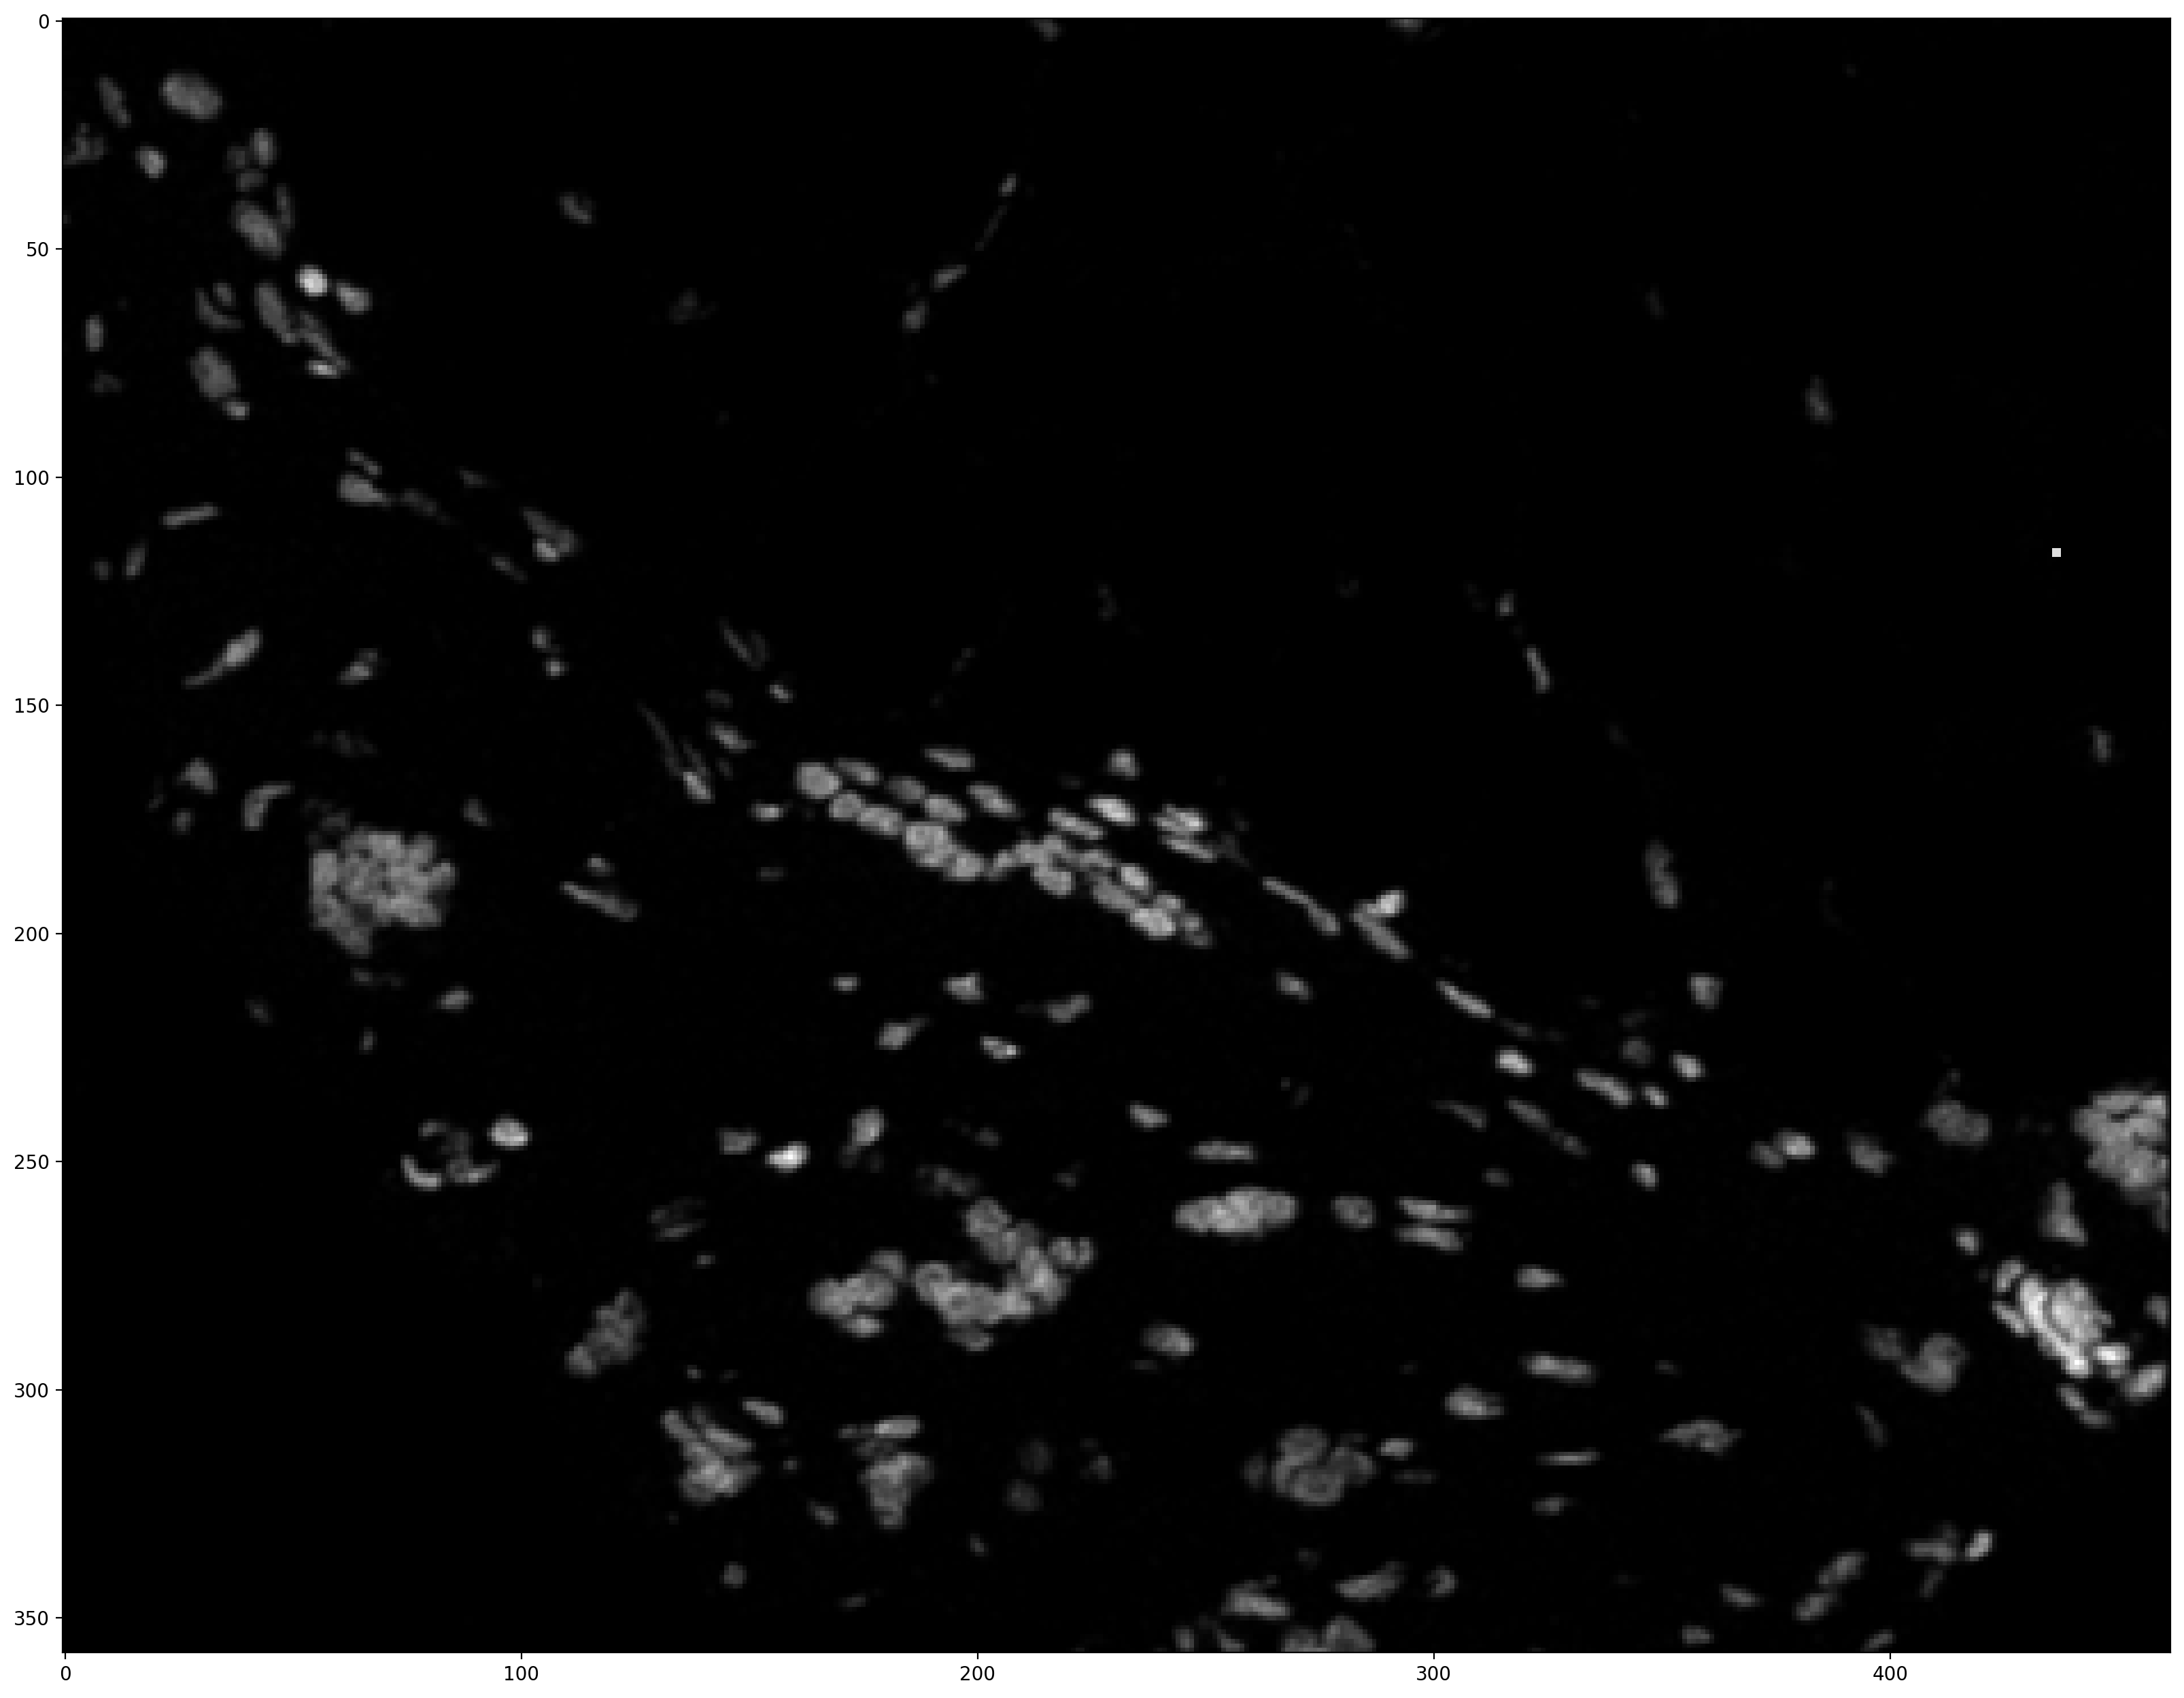

In [31]:
figure(figsize = (20, 20), dpi = 200)
img_smooth_norm = IP.normalize_by_channel(smooth_img)
img_smooth_norm = np.moveaxis(img_smooth_norm, -1, 0)
plt.imshow(img_smooth_norm[37,:,:], cmap='gray')
plt.show()